Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [17]:
pip install tensorflow

In [18]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [19]:
# Hyper-parameters data-loading and formatting

# Parameters
batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [20]:
# Convert train and test data to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the data
x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


In [21]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.4726 - accuracy: 0.8650 - val_loss: 0.2569 - val_accuracy: 0.9275
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2330 - accuracy: 0.9336 - val_loss: 0.1963 - val_accuracy: 0.9406
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1809 - accuracy: 0.9473 - val_loss: 0.1666 - val_accuracy: 0.9492
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1501 - accuracy: 0.9563 - val_loss: 0.1391 - val_accuracy: 0.9580
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1277 - accuracy: 0.9629 - val_loss: 0.1267 - val_accuracy: 0.9625
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1108 - accuracy: 0.9679 - val_loss: 0.1128 - val_accuracy: 0.9642
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0971 - accuracy: 0.9718 - val_loss: 0.1148 - val_accuracy: 0.9644
Epoch 

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


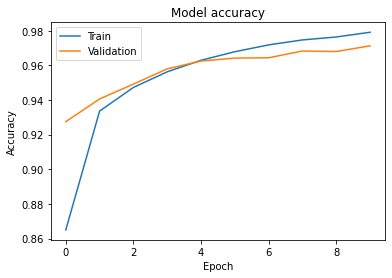

In [23]:
# Plot training and validation accuracy values
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [35]:
import numpy as np
from keras import regularizers

# Train for 40 epochs
epochs = 40

# Five different regularization factors in the range [0.000001, 0.001] chosen arbitrarily
reg_factors = [0.000001, 0.00002, 0.0001, 0.0005, 0.001]

# Create matrix that stores accuracy values for each regression factor with three replicates networks each.
accuracy = np.zeros([3,len(reg_factors)], dtype=float)

# Implement a three-layer neural network with two hidden laters with 500 and 300 hidden units respectively. Train for five different
# regression factors. The neural network is trained for three times for each regularization factor
for j, regression_factor in enumerate(reg_factors):
        for i in range(3):
                model = Sequential()
                model.add(Flatten())
                model.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(regression_factor)))
                model.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(regression_factor)))
                model.add(Dense(num_classes, activation='softmax'))

                model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

                fit_info = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
                score = model.evaluate(x_test, y_test, verbose=0)
                print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
        
                accuracy[i,j] = score[1]

    

Epoch 1/40
469/469 [==============================] - 6s 12ms/step - loss: 0.4048 - accuracy: 0.8879 - val_loss: 0.2171 - val_accuracy: 0.9381
Epoch 2/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1903 - accuracy: 0.9454 - val_loss: 0.1636 - val_accuracy: 0.9538
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1389 - accuracy: 0.9605 - val_loss: 0.1242 - val_accuracy: 0.9635
Epoch 4/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1091 - accuracy: 0.9688 - val_loss: 0.1017 - val_accuracy: 0.9701
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0888 - accuracy: 0.9751 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 6/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0747 - accuracy: 0.9786 - val_loss: 0.0836 - val_accuracy: 0.9747
Epoch 7/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.0851 - val_accuracy: 0.9739
Epoc

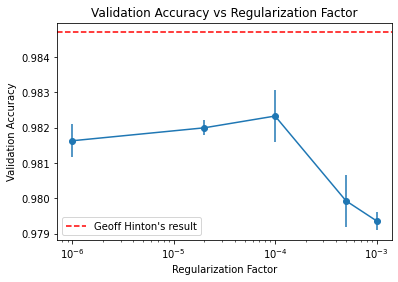

In [36]:
# Calculate mean validation accuracy for each regularization factor
mean_accuracy = np.mean(accuracy, axis=0)
std_deviation = np.std(accuracy, axis=0)

# Plot the mean and standard deviation of the validation accuracy for each regularization factor
# as well as Geoff Hinton's results.
# yer = Error or standard deviation of the validation accuracy for each regularization factor. 
plt.errorbar(regression_factors, mean_accuracy, yerr=std_deviation, fmt='-o')
plt.axhline(y=0.9847, color='r', linestyle='--', label="Geoff Hinton's result")
plt.xscale('log')
plt.xlabel('Regularization Factor')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Regularization Factor')
plt.legend()
plt.show()